In [1]:
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('chesterish')

# U.S. Medical Insurance Costs
In this project, 'insurance.csv' will be analysed using Python. The goal of this project is to learn multiple attributes about patient information.

In [11]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [7]:
# Find out the average age of the patients in the dataset.
print('Average age: ', df.age.mean())

Average age:  39.20702541106129


In [41]:
# Sex
print(df.groupby('sex').charges.count().reset_index())

      sex  charges
0  female      662
1    male      676


      Region  Count
0  northeast    324
1  northwest    325
2  southeast    364
3  southwest    325


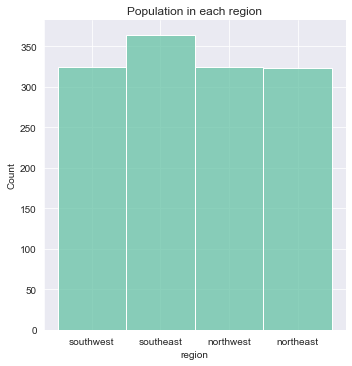

Patients are mainly from  southeast  which are  364  people.


In [149]:
# Analyse where a majority of the individuals are from.
df_region = df.groupby('region').charges.count().reset_index()
df_region.columns = ['Region', 'Count']
print(df_region)

# Visualisation
# Set color palette
sns.set_palette('Set2')

# Set style
sns.set_style('darkgrid')

sns.displot(data = df, x = 'region')
plt.title('Population in each region')
plt.show()

idx = df_region[df_region.Count == df_region.Count.max()].index.tolist()
print('Patients are mainly from ', df_region.iloc[idx[0]].Region, ' which are ', 
      df_region.Count.max(), ' people.')

In [21]:
# Look at the different costs between smokers vs. non-smokers.
print(df.groupby('smoker').charges.mean().reset_index())

  smoker       charges
0     no   8434.268298
1    yes  32050.231832


In [39]:
# Figure out what the average age is for someone who has at least one child in this dataset.
print(df[df.children >= 1].age.mean())

39.78010471204188


In [43]:
# Charges
print('Average charge: ', df.charges.mean(), ' dollars')

Average charge:  13270.422265141257  dollars


In [8]:
df['sex'] = pd.Categorical(df['sex'], ['male', 'female'], ordered=True)
df['sex_codes'] = df['sex'].cat.codes

df['smoker'] = pd.Categorical(df['smoker'], ['no', 'yes'], ordered=True)
df['smoker_codes'] = df['smoker'].cat.codes

df['region'] = pd.Categorical(df['region'], ['northeast', 'northwest', 'southeast', 
                                             'southwest'], ordered=True)
df['region_codes'] = df['region'].cat.codes

df.corr()

,age,bmi,children,charges,sex_codes,smoker_codes,region_codes
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.025019,0.002127
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.003750,0.157566
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.007673,0.016569
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.787251,-0.006208
sex_codes,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-0.076185,-0.004588
smoker_codes,-0.025019,0.003750,0.007673,0.787251,-0.076185,1.000000,-0.002181
region_codes,0.002127,0.157566,0.016569,-0.006208,-0.004588,-0.002181,1.000000


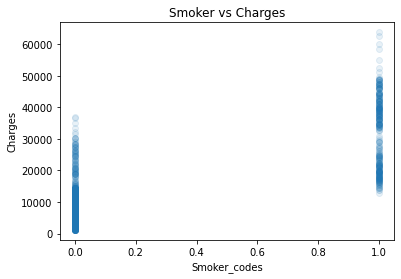

In [27]:
# plot smoker_codes against charges here
plt.scatter(df.smoker_codes, df.charges, alpha = .1)
plt.title('Smoker vs Charges')
plt.xlabel('Smoker_codes')
plt.ylabel('Charges')
plt.show()

0.6209171887977797
0.6150422465863654


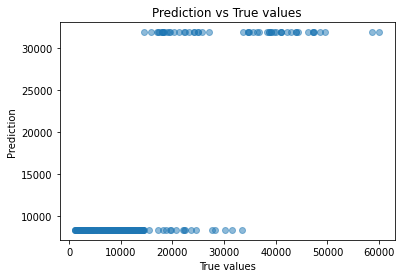

In [26]:
## One feature
# select the feature
features = df[['smoker_codes']]
costs = df['charges']

# split data into traning and test sets
X_train, X_test, y_train, y_test = train_test_split(features, costs, test_size = 0.2, 
                                                    random_state = 1)
# linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# score
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

# prediction
y_predicted = model.predict(X_test)

plt.scatter(y_test, y_predicted, alpha = .5)
plt.title('Prediction vs True values')
plt.xlabel('True values')
plt.ylabel('Prediction')
plt.show()

0.7216042573043886
0.7204384958923451


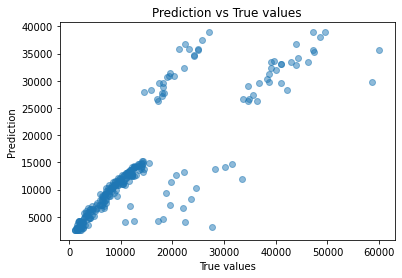

In [25]:
## Two features
# select the feature
features = df[['smoker_codes', 'age']]
costs = df['charges']

# split data into traning and test sets
X_train, X_test, y_train, y_test = train_test_split(features, costs, test_size = 0.2, 
                                                    random_state = 1)
# linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# score
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

# prediction
y_predicted = model.predict(X_test)

plt.scatter(y_test, y_predicted, alpha = .5)
plt.title('Prediction vs True values')
plt.xlabel('True values')
plt.ylabel('Prediction')
plt.show()

0.7449386448927937
0.7567968214396313


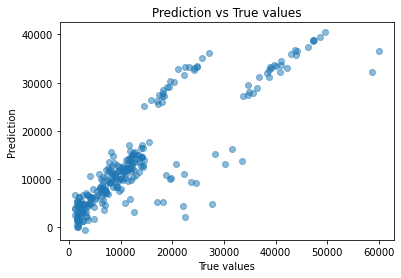

In [24]:
## Three features
# select the feature
features = df[['smoker_codes', 'age', 'bmi']]
costs = df['charges']

# split data into traning and test sets
X_train, X_test, y_train, y_test = train_test_split(features, costs, test_size = 0.2, 
                                                    random_state = 1)
# linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# score
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

# prediction
y_predicted = model.predict(X_test)

plt.scatter(y_test, y_predicted, alpha = .5)
plt.title('Prediction vs True values')
plt.xlabel('True values')
plt.ylabel('Prediction')
plt.show()

0.7475615631933097
0.7623224022563388


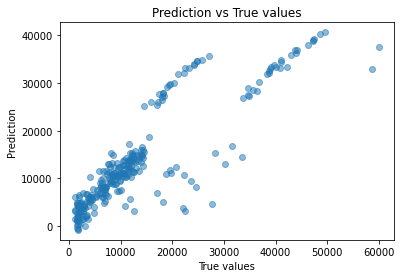

In [23]:
## All features
# select the feature
features = df[['smoker_codes', 'age', 'bmi', 'children', 'sex_codes', 'region_codes']]
costs = df['charges']

# split data into traning and test sets
X_train, X_test, y_train, y_test = train_test_split(features, costs, test_size = 0.2, 
                                                    random_state = 1)
# linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# score
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

# prediction
y_predicted = model.predict(X_test)

plt.scatter(y_test, y_predicted, alpha = .5)
plt.title('Prediction vs True values')
plt.xlabel('True values')
plt.ylabel('Prediction')
plt.show()